In [1]:
# Libraries

import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Reload Data
#From first file:

# Upload historical data
cake_hist = pd.read_csv("Gnad_Historical_Data.csv")
cake_hist.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-01-03 00:00:00-05:00,7.885254,7.921558,7.725516,7.812645,1307475,0.0,0.0
1,2000-01-04 00:00:00-05:00,7.754560,7.841689,7.551257,7.652908,532238,0.0,0.0
2,2000-01-05 00:00:00-05:00,7.638389,7.972387,7.580302,7.696475,219375,0.0,0.0
3,2000-01-06 00:00:00-05:00,7.783601,7.783601,7.638385,7.681950,903150,0.0,0.0
4,2000-01-07 00:00:00-05:00,7.681951,7.696473,7.551257,7.551257,65475,0.0,0.0


In [3]:
#3b-ii-1

# Extract the 'Close' column as a NumPy array
data = cake_hist["Close"].values

# Define the sequence length
sequence_length = 3

# Create input sequences and targets
sequences = []
target = []
for i in range(len(data) - sequence_length):
    sequences.append(data[i:i + sequence_length])
    target.append(data[i + sequence_length])

# Convert to NumPy arrays
X = np.array(sequences)
y = np.array(target)

# Reshape X for LSTM input
X = X.reshape(X.shape[0], sequence_length, 1)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - loss: 443.3339 - mae: 17.0878 - val_loss: 133.7840 - val_mae: 9.8042
Epoch 2/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 106.9443 - mae: 8.2308 - val_loss: 19.6513 - val_mae: 2.3223
Epoch 3/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 17.1780 - mae: 2.4526 - val_loss: 7.4558 - val_mae: 1.6601
Epoch 4/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 7.0669 - mae: 1.5534 - val_loss: 4.0987 - val_mae: 1.2711
Epoch 5/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 3.9920 - mae: 1.2722 - val_loss: 2.2687 - val_mae: 0.8561
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5065 - mae: 0.9048
Test Loss: 2.2687
Test MAE: 0.8561


<ipython-input-4-c80b20263e08>:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  cake_hist["Date"] = pd.to_datetime(cake_hist["Date"])


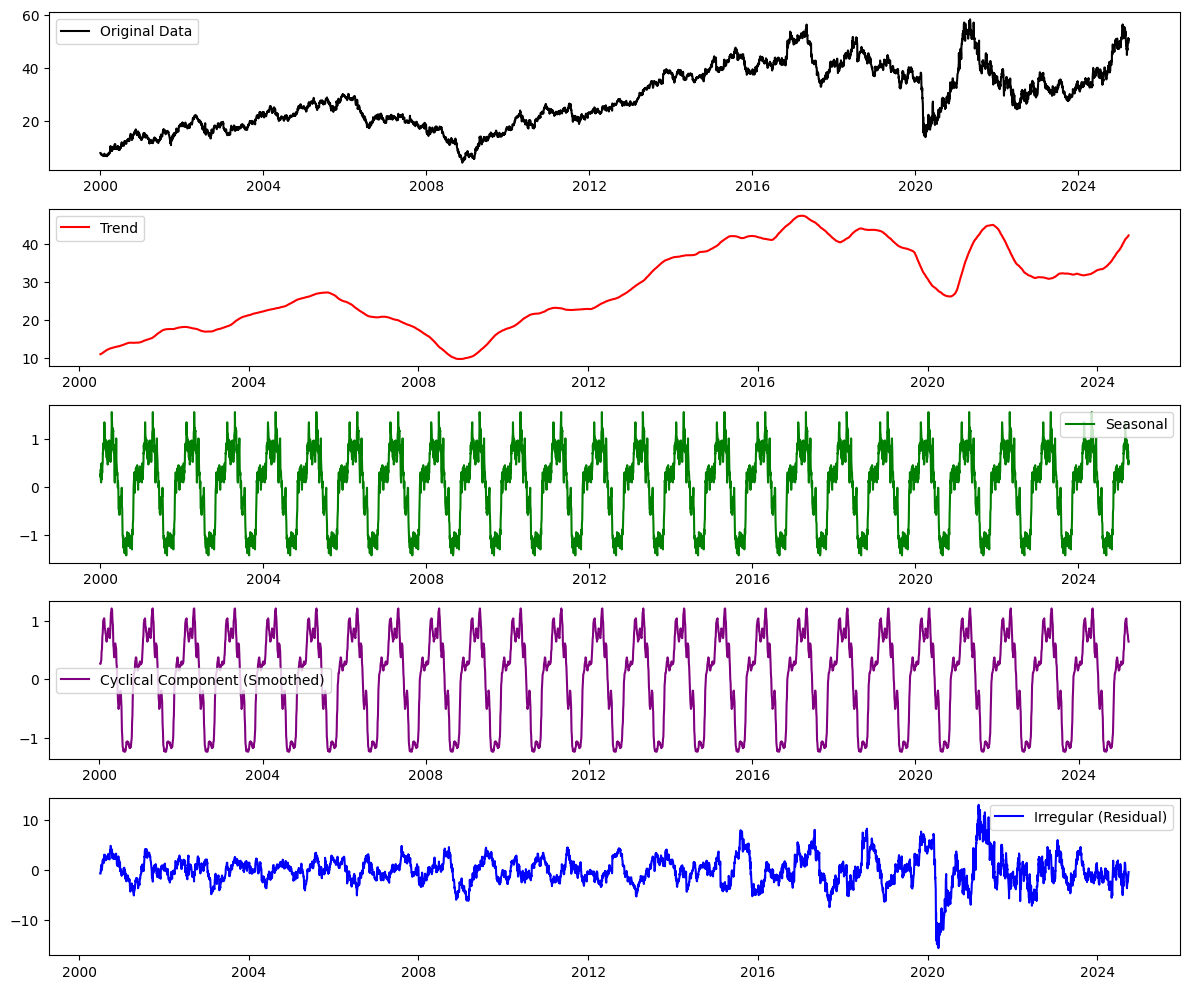

In [4]:
#3b-ii-2 Develop a python program for decomposing the above timeseries into 4 components (as is shown below) using downloaded data (check the link for the sample visual model)

# Convert 'Date' to datetime and set as index
cake_hist["Date"] = pd.to_datetime(cake_hist["Date"])
cake_hist.set_index("Date", inplace=True)

# Extract the 'Close' column
data = cake_hist["Close"]

# Decompose time series
decomposition = seasonal_decompose(data, model='additive', period=252)

# Get components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
cyclical = seasonal.rolling(window=10, center=True).mean()
irregular = residual - cyclical

# Plot with color-coded components
plt.figure(figsize=(12, 10))

plt.subplot(511)
plt.plot(data, color='black', label='Original Data')
plt.legend(loc='best')

plt.subplot(512)
plt.plot(trend, color='red', label='Trend')
plt.legend(loc='best')

plt.subplot(513)
plt.plot(seasonal, color='green', label='Seasonal')
plt.legend(loc='best')

plt.subplot(514)
plt.plot(cyclical, color='purple', label='Cyclical Component (Smoothed)')
plt.legend(loc='best')

plt.subplot(515)
plt.plot(irregular, color='blue', label='Irregular (Residual)')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


199/199 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.0435 - mae: 0.1286
Epoch 2/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 7.9206e-04 - mae: 0.0205
Epoch 3/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 6.6716e-04 - mae: 0.0186
Epoch 4/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 5.9559e-04 - mae: 0.0176
Epoch 5/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 5.4684e-04 - mae: 0.0172


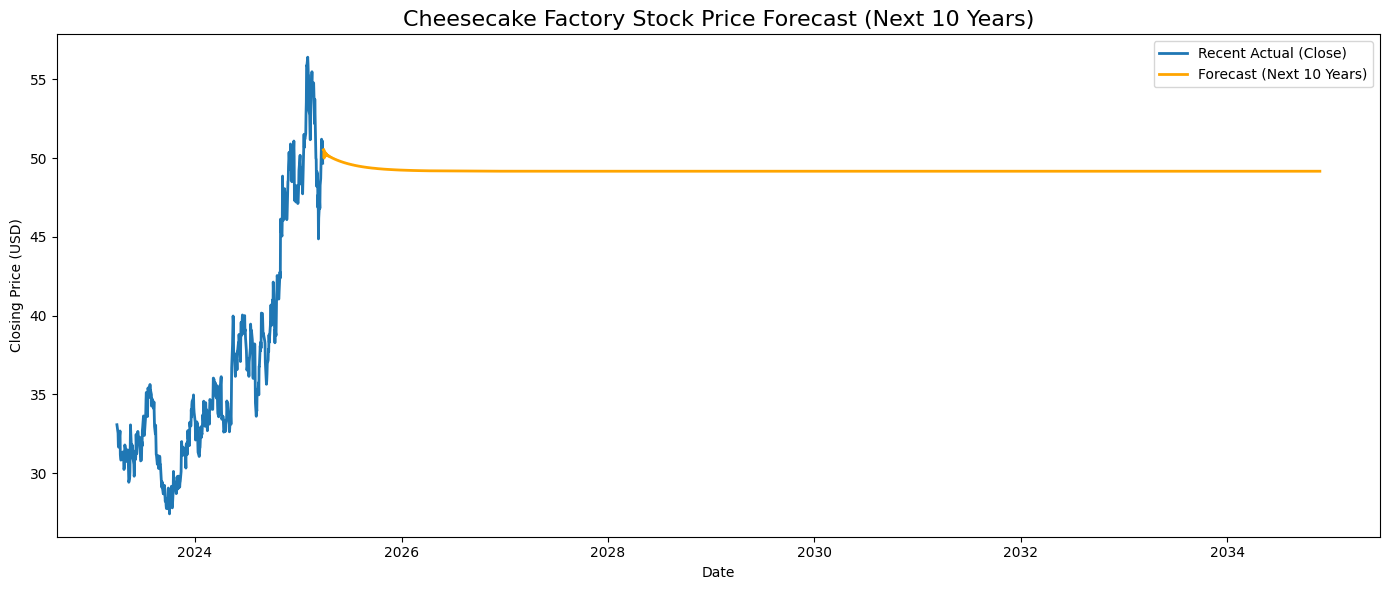

In [5]:
#3b-ii-3

# === STEP 1: Preprocessing & Scaling ===
sequence_length = 3
data = cake_hist["Close"].values.reshape(-1, 1)

# Scale data to [0, 1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
sequences = []
target = []
for i in range(len(scaled_data) - sequence_length):
    sequences.append(scaled_data[i:i + sequence_length])
    target.append(scaled_data[i + sequence_length])

X = np.array(sequences)
y = np.array(target)

# === STEP 2: Train LSTM model on entire historical data ===
model = Sequential()
model.add(LSTM(128, input_shape=(sequence_length, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X, y, epochs=5, batch_size=32)

# === STEP 3: Forecast 10 Years (2520 business days) ===
future_predictions = []
last_sequence = scaled_data[-sequence_length:]

for _ in range(2520):
    input_seq = last_sequence.reshape(1, sequence_length, 1)
    next_scaled = model.predict(input_seq, verbose=0)[0][0]
    future_predictions.append(next_scaled)
    last_sequence = np.append(last_sequence[1:], next_scaled)

# Inverse transform predictions to real prices
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# === STEP 4: Generate future date range and create DataFrame ===
last_date = cake_hist.index[-1]
future_dates = pd.bdate_range(start=last_date + pd.Timedelta(days=1), periods=2520)

future_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted_Close": future_predictions
}).set_index("Date")

# === STEP 5: (Optional) Plot the results ===
plt.figure(figsize=(14, 6))
plt.plot(cake_hist.index[-500:], cake_hist["Close"].values[-500:], label='Recent Actual (Close)', linewidth=2)
plt.plot(future_df.index, future_df["Predicted_Close"], label='Forecast (Next 10 Years)', color='orange', linewidth=2)
plt.title("Cheesecake Factory Stock Price Forecast (Next 10 Years)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()


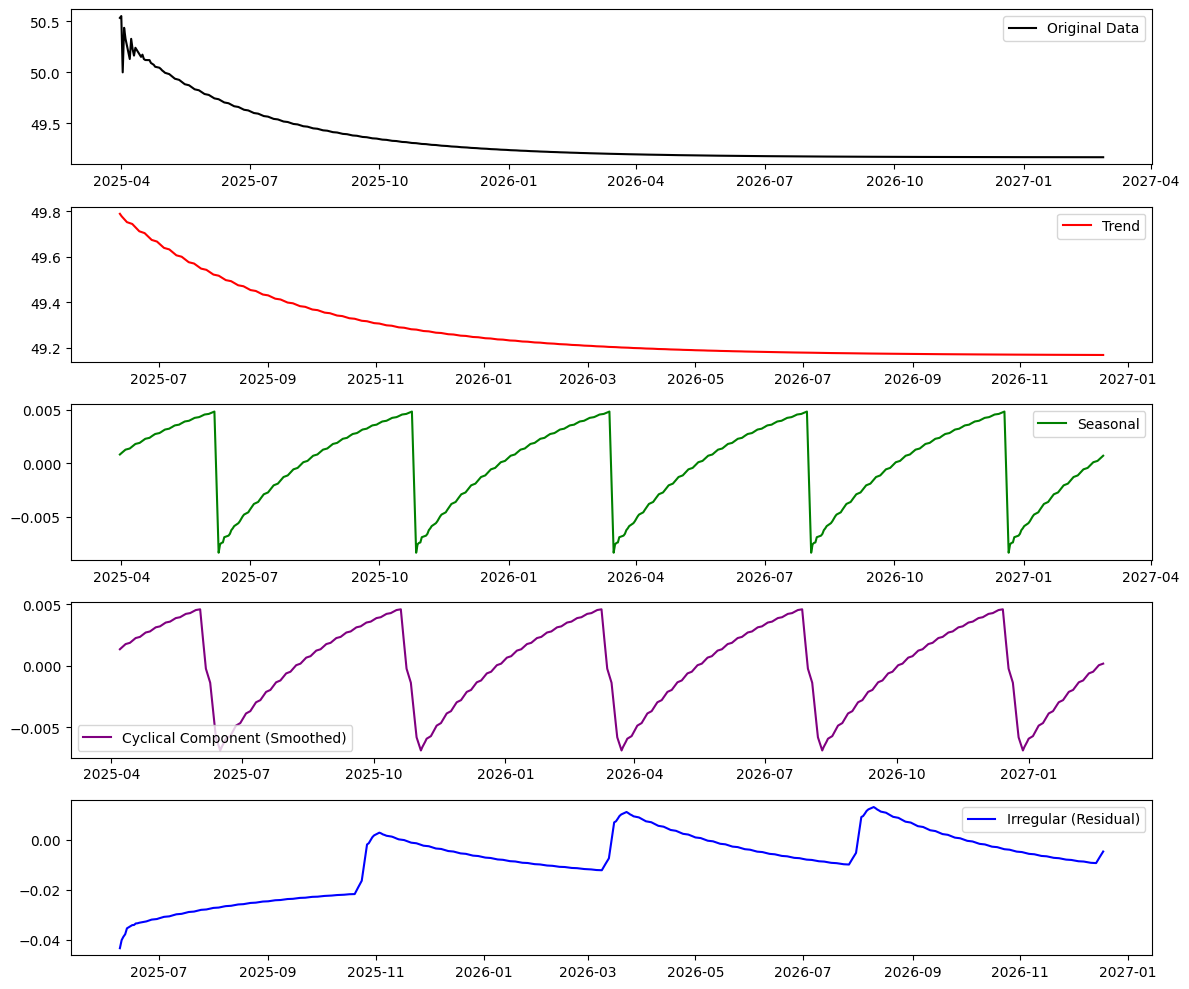

In [6]:
#3b-ii-4

# === Use only first ~2 years of the forecast for decomposition ===
predicted_subset = future_df["Predicted_Close"].iloc[:500]  # ~2 years of business days

# Decompose with a shorter seasonal period (~quarterly)
decomposition = seasonal_decompose(predicted_subset, model='additive', period=100)

# Components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
cyclical = seasonal.rolling(window=10, center=True).mean()
irregular = residual - cyclical

# Plot
plt.figure(figsize=(12, 10))

plt.subplot(511)
plt.plot(predicted_subset, color='black', label='Original Data')
plt.legend(loc='best')

plt.subplot(512)
plt.plot(trend, color='red', label='Trend')
plt.legend(loc='best')

plt.subplot(513)
plt.plot(seasonal, color='green', label='Seasonal')
plt.legend(loc='best')

plt.subplot(514)
plt.plot(cyclical, color='purple', label='Cyclical Component (Smoothed)')
plt.legend(loc='best')

plt.subplot(515)
plt.plot(irregular, color='blue', label='Irregular (Residual)')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


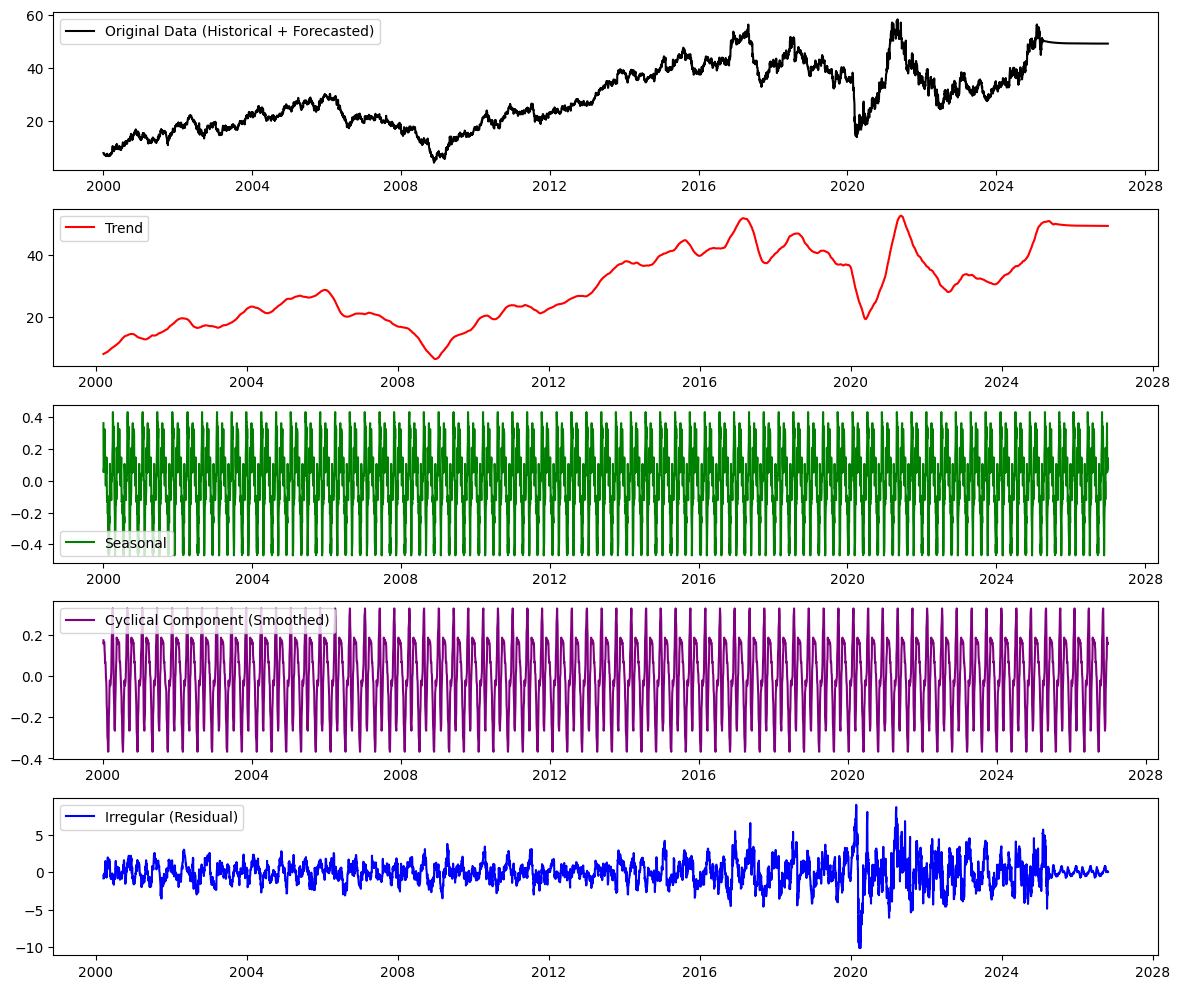

In [7]:
# === Step 1: Combine historical and forecasted data ===
combined_series = pd.concat([
    cake_hist["Close"],
    future_df["Predicted_Close"]
])

# === Step 2: Ensure index is timezone-naive (handles mixed tz safely) ===
combined_series.index = pd.to_datetime(combined_series.index, utc=True).tz_localize(None)

# === Step 3: Slice to 2000–2027 ===
combined_subset = combined_series.loc[:pd.Timestamp("2027")]

# === Step 4: Decompose the combined series ===
decomposition = seasonal_decompose(combined_subset, model='additive', period=100)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
cyclical = seasonal.rolling(window=10, center=True).mean()
irregular = residual - cyclical

# === Step 5: Plot the components ===
plt.figure(figsize=(12, 10))

plt.subplot(511)
plt.plot(combined_subset, color='black', label='Original Data (Historical + Forecasted)')
plt.legend(loc='best')

plt.subplot(512)
plt.plot(trend, color='red', label='Trend')
plt.legend(loc='best')

plt.subplot(513)
plt.plot(seasonal, color='green', label='Seasonal')
plt.legend(loc='best')

plt.subplot(514)
plt.plot(cyclical, color='purple', label='Cyclical Component (Smoothed)')
plt.legend(loc='best')

plt.subplot(515)
plt.plot(irregular, color='blue', label='Irregular (Residual)')
plt.legend(loc='best')

plt.tight_layout()
plt.show()
